# Trip Pricing with Taxi Mobility Analytics

Matching the right cabs with the right customers quickly and efficiently

![picture](https://drive.google.com/uc?export=view&id=1yTMgRrwyvbR7iVStiPVQJ6c7q2bbep0T)


# Data and problem
We are predicting the surge price type for our company that is sigma cabs.
Previously surge price was given by service providers,from that information they have captured surgeprice type ,we are building a predictive model based on that surge price_type,so that they can fix the fare beforehand.

# column Descriptions
Trip_ID: ID for TRIP

Trip_Distance: The distance for the trip requested by the customer

TypeofCab: Category of the cab requested by the customer

CustomerSinceMonths: Customer using cab services since n months; 0 month means current month

LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
                (Proprietary Index means a designated group of securities or instruments that (i) measures or represents the performance of a specific segment of the market for U.S.)

ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating: Average of life time ratings of the customer till date

CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

Gender: Gender of the customer

SurgePricingType: Target (can be of 3 types)

# Lifecycle in the project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[10,5]

# Reading CSV

In [197]:
df = pd.read_csv('sigma_cabs.csv')

In [198]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [199]:
df.shape

(131662, 14)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [201]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('object')

In [202]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [203]:
df.nunique()

Trip_ID                        131662
Trip_Distance                   10326
Type_of_Cab                         5
Customer_Since_Months              11
Life_Style_Index                55978
Confidence_Life_Style_Index         3
Destination_Type                   14
Customer_Rating                  3931
Cancellation_Last_1Month            9
Var1                              122
Var2                               58
Var3                               96
Gender                              2
Surge_Pricing_Type                  3
dtype: int64

# Segregating into 3 dataframes to impute null values according class differentiation

In [204]:
s1 = df[df['Surge_Pricing_Type']==1]

In [205]:
s2 = df[df['Surge_Pricing_Type']==2]

In [206]:
s3 = df[df['Surge_Pricing_Type']==3]

In [207]:
Missing_1=s1.isnull().sum()[s1.isnull().sum()>0].sort_values(ascending=False)
Missing_1

Var1                           17915
Type_of_Cab                     4205
Confidence_Life_Style_Index     4176
Life_Style_Index                4176
Customer_Since_Months           1147
dtype: int64

In [208]:
Percent_missing_1=(Missing_1/s1.shape[0])*100
Percent_missing_1

Var1                           65.830087
Type_of_Cab                    15.451606
Confidence_Life_Style_Index    15.345043
Life_Style_Index               15.345043
Customer_Since_Months           4.214742
dtype: float64

In [209]:
Missing_2=s2.isnull().sum()[s2.isnull().sum()>0].sort_values(ascending=False)
Missing_2

Var1                           29740
Type_of_Cab                     8645
Confidence_Life_Style_Index     8637
Life_Style_Index                8637
Customer_Since_Months           2540
dtype: int64

In [210]:
Percent_missing_2=(Missing_2/s2.shape[0])*100
Percent_missing_2

Var1                           52.425610
Type_of_Cab                    15.239388
Confidence_Life_Style_Index    15.225286
Life_Style_Index               15.225286
Customer_Since_Months           4.477507
dtype: float64

In [211]:
Missing_3=s3.isnull().sum()[s3.isnull().sum()>0].sort_values(ascending=False)
Missing_3

Var1                           23375
Confidence_Life_Style_Index     7380
Life_Style_Index                7380
Type_of_Cab                     7360
Customer_Since_Months           2233
dtype: int64

In [212]:
Percent_missing_3=(Missing_3/s3.shape[0])*100
Percent_missing_3

Var1                           48.983655
Confidence_Life_Style_Index    15.465214
Life_Style_Index               15.465214
Type_of_Cab                    15.423303
Customer_Since_Months           4.679380
dtype: float64

In [213]:
df_null_1=pd.DataFrame({"Missing_values":Missing_1,"Percent_missing":Percent_missing_1})
df_null_1

,Missing_values,Percent_missing
Var1,17915,65.830087
Type_of_Cab,4205,15.451606
Confidence_Life_Style_Index,4176,15.345043
Life_Style_Index,4176,15.345043
Customer_Since_Months,1147,4.214742


In [214]:
df_null_2=pd.DataFrame({"Missing_values":Missing_2,"Percent_missing":Percent_missing_2})
df_null_2

,Missing_values,Percent_missing
Var1,29740,52.425610
Type_of_Cab,8645,15.239388
Confidence_Life_Style_Index,8637,15.225286
Life_Style_Index,8637,15.225286
Customer_Since_Months,2540,4.477507


In [215]:
df_null_3=pd.DataFrame({"Missing_values":Missing_3,"Percent_missing":Percent_missing_3})
df_null_3

,Missing_values,Percent_missing
Var1,23375,48.983655
Confidence_Life_Style_Index,7380,15.465214
Life_Style_Index,7380,15.465214
Type_of_Cab,7360,15.423303
Customer_Since_Months,2233,4.679380


In [216]:
s1 = s1.drop(columns=['Var1'])
s2 = s2.drop(columns=['Var1'])
s3 = s3.drop(columns=['Var1'])


In [217]:
s1.shape

(27214, 13)

In [218]:
s2.shape

(56728, 13)

In [219]:
s3.shape

(47720, 13)

In [220]:
s1.describe()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,27214.000000,23038.000000,27214.000000,27214.000000,27214.000000,27214.000000,27214.0
mean,41.061633,2.847554,3.112791,0.516242,51.316785,76.252223,1.0
std,22.437245,0.227175,0.915237,0.841111,4.948862,11.256905,0.0
min,0.310000,1.786040,0.010000,0.000000,41.000000,52.000000,1.0
25%,23.560000,2.700203,2.475000,0.000000,48.000000,68.000000,1.0
50%,36.685000,2.847500,3.171250,0.000000,51.000000,75.000000,1.0
75%,56.100000,2.992835,3.800000,1.000000,54.000000,83.000000,1.0
max,109.220000,4.690120,5.000000,6.000000,89.000000,137.000000,1.0


In [221]:
s2.describe()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,56728.000000,48091.000000,56728.000000,56728.000000,56728.000000,56728.000000,56728.0
mean,41.269265,2.789416,2.857688,0.708627,51.064078,74.772299,2.0
std,23.894454,0.223317,0.969204,0.992017,4.930769,11.523530,0.0
min,1.590000,1.596380,0.002500,0.000000,40.000000,52.000000,2.0
25%,23.380000,2.645410,2.172500,0.000000,48.000000,66.000000,2.0
50%,36.170000,2.782820,2.905000,0.000000,50.000000,73.000000,2.0
75%,55.330000,2.930820,3.579063,1.000000,54.000000,81.000000,2.0
max,109.230000,4.853780,5.000000,7.000000,124.000000,174.000000,2.0


In [222]:
s3.describe()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,47720.000000,40340.000000,47720.000000,47720.000000,47720.000000,47720.000000,47720.0
mean,49.476234,2.791163,2.689500,1.023093,51.302703,74.829757,3.0
std,28.068398,0.224645,0.996941,1.136713,5.068173,11.781039,0.0
min,1.540000,1.835630,0.001250,0.000000,40.000000,52.000000,3.0
25%,28.310000,2.647848,1.981250,0.000000,48.000000,66.000000,3.0
50%,45.520000,2.783295,2.711250,1.000000,50.000000,73.000000,3.0
75%,67.870000,2.929485,3.425000,2.000000,54.000000,82.000000,3.0
max,109.230000,4.875110,5.000000,8.000000,101.000000,206.000000,3.0


In [223]:
from sklearn.impute import SimpleImputer

In [224]:
df.skew()

Trip_Distance               0.723752
Customer_Since_Months      -0.246954
Life_Style_Index            0.193994
Customer_Rating            -0.191131
Cancellation_Last_1Month    1.550869
Var1                        0.465401
Var2                        1.184634
Var3                        0.828977
Surge_Pricing_Type         -0.255149
dtype: float64

# Imputing Null Values based on the datatypes and the Classes

In [225]:
sm = SimpleImputer(strategy='most_frequent')
data = sm.fit_transform(s1.select_dtypes('object'))
data2 = sm.fit_transform(s2.select_dtypes('object'))
data3 = sm.fit_transform(s3.select_dtypes('object'))


In [226]:
sm = SimpleImputer(strategy='mean')
data_num = sm.fit_transform(s1.select_dtypes('number'))
data_num1 = sm.fit_transform(s2.select_dtypes('number'))
data_num2 = sm.fit_transform(s3.select_dtypes('number'))


In [227]:
data = pd.DataFrame(data,columns = s1.select_dtypes('object').columns)
data2 = pd.DataFrame(data2,columns = s2.select_dtypes('object').columns)
data3 = pd.DataFrame(data3,columns = s3.select_dtypes('object').columns)


In [228]:
data_num = pd.DataFrame(data_num,columns = s1.select_dtypes('number').columns)
data_num1 = pd.DataFrame(data_num1,columns = s2.select_dtypes('number').columns)
data_num2 = pd.DataFrame(data_num2,columns = s3.select_dtypes('number').columns)


In [229]:
s1 = pd.concat([data,data_num],axis=1)
s2 = pd.concat([data2,data_num1],axis=1)
s3 = pd.concat([data3,data_num2],axis=1)


In [230]:
df1 = pd.concat([s1,s2,s3])

In [231]:
df.shape

(131662, 14)

In [232]:
df1.shape

(131662, 13)

In [233]:
df1.isnull().sum()

Trip_ID                        0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

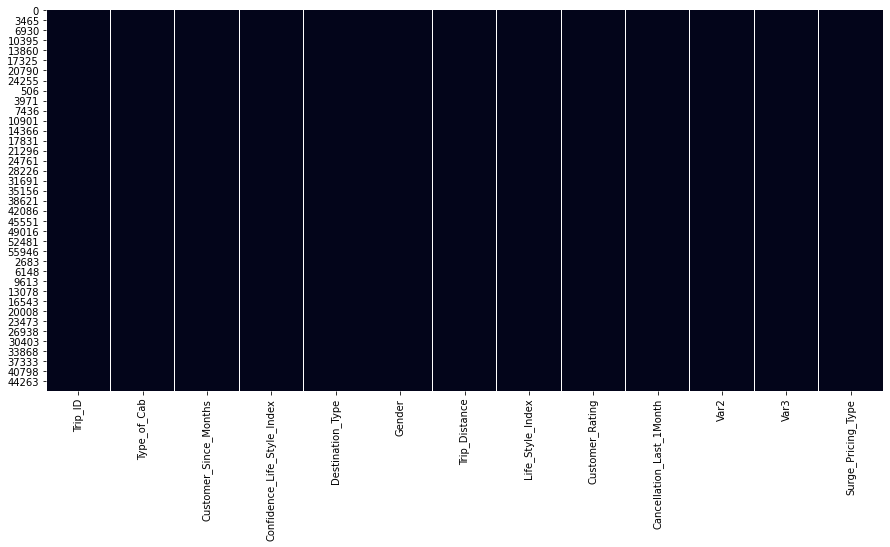

In [234]:
plt.figure(figsize=[15,7])
sns.heatmap(df1.isnull(),cbar=False)
plt.show()

# Checking for Class imbalance

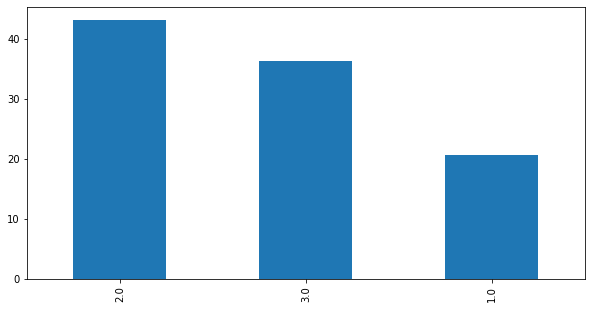

In [235]:
(df1['Surge_Pricing_Type'].value_counts(normalize=True)*100).plot(kind='bar')

In [236]:
df1['Surge_Pricing_Type'].value_counts()

2.0    56728
3.0    47720
1.0    27214
Name: Surge_Pricing_Type, dtype: int64

In [237]:
df1 = df1.drop(columns=['Trip_ID'])

In [75]:
df1.shape

(131662, 12)

# **Outliers**

In [238]:
df2 = df1.copy()

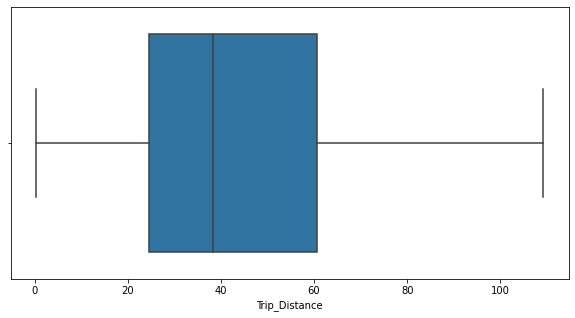

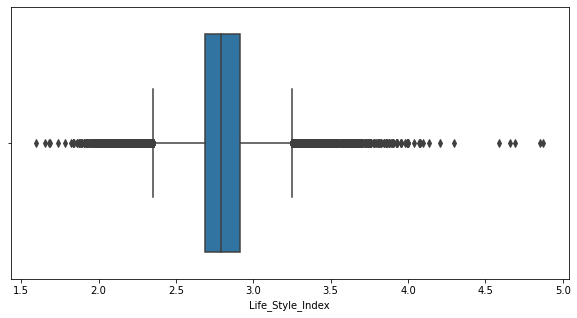

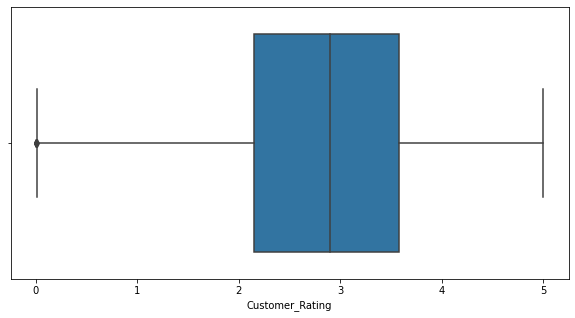

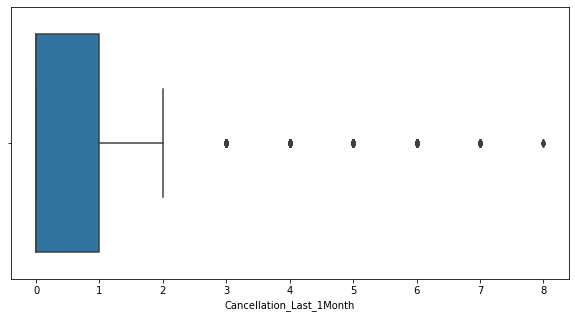

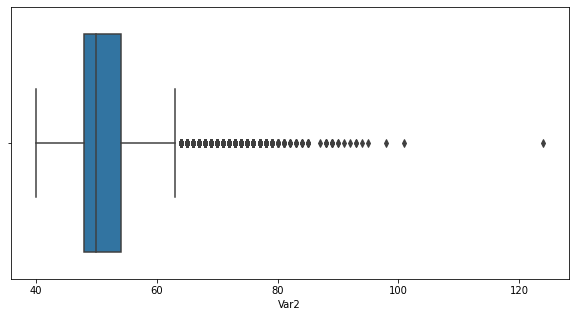

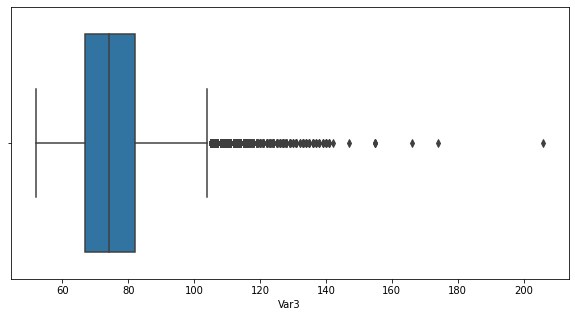

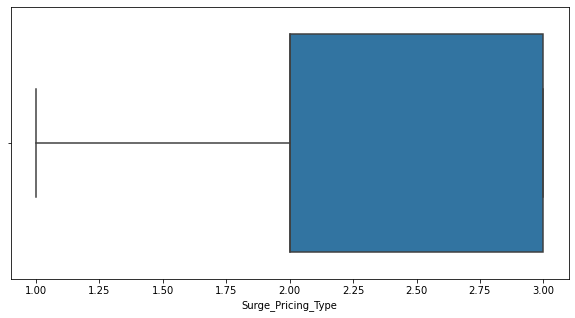

In [239]:
for i in df2.select_dtypes('number'):
  sns.boxplot(df2[i])
  plt.show()

In [78]:
for i in df2.select_dtypes('number').columns:
  q1 = df2[i].quantile(0.25)
  q3 = df2[i].quantile(0.75)
  iqr = q3-q1
  ll = q1-(1.5*iqr)
  ul = q3+(1.5*iqr)
  df2 = df2[(df2[i]>ll)&(df2[i]<ul)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


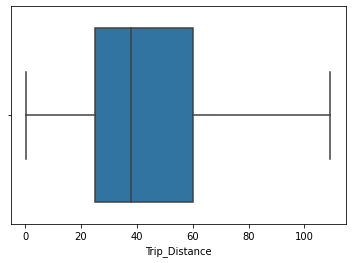

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


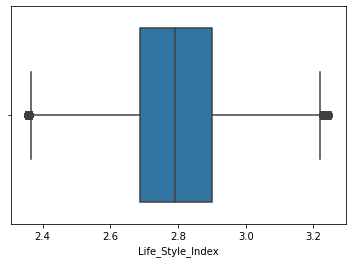

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


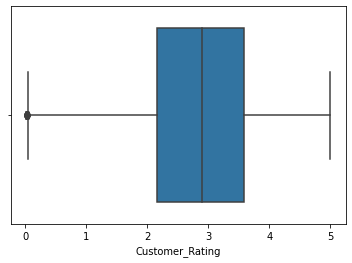

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


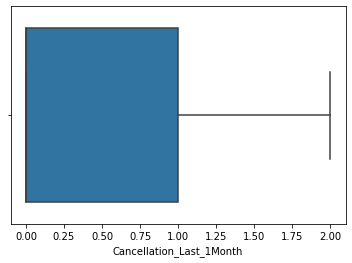

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


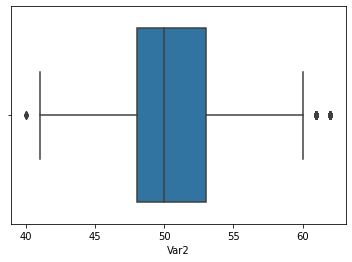

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


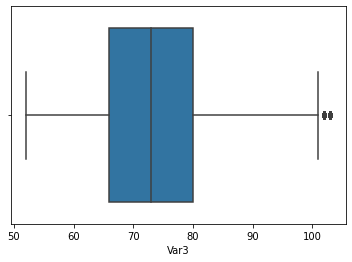

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


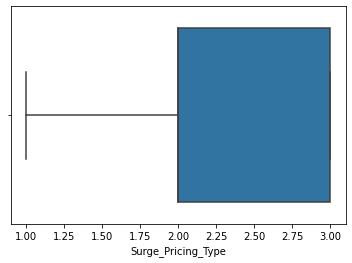

In [79]:
for i in df2.select_dtypes('number'):
  sns.boxplot(df2[i])
  plt.show()

In [80]:
df2.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [81]:
df2.shape

(112402, 12)

# checking for multicollinearity

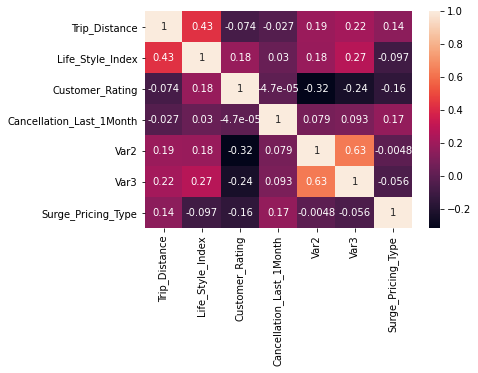

In [82]:
sns.heatmap(df2.corr(),annot=True)

In [ ]:
# due to multi-collinearity between var2 and var3, we are dropping var2

In [240]:
num_features=df1.select_dtypes(exclude="object")
num_features.columns

Index(['Trip_Distance', 'Life_Style_Index', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var2', 'Var3', 'Surge_Pricing_Type'],
      dtype='object')

In [241]:
cat_features=df1.select_dtypes(include="object")
cat_features.columns

Index(['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

# **STATISTICAL TEST**

# **ANOVA TEST - Target and Numerical variables**

HYPOTHESIS TEST 
# Ho : All means are equal ( No relation)
# Ha : Atleast one mean is not equal ( Relation)

In [242]:
for col in df1[num_features.columns]:
  surge_1=df1[df1['Surge_Pricing_Type']==1][col]
  surge_2=df1[df1['Surge_Pricing_Type']==2][col]
  surge_3=df1[df1['Surge_Pricing_Type']==3][col]
  print(col,":",stats.f_oneway(surge_1,surge_2,surge_3))
  print(" ")
  

Trip_Distance : F_onewayResult(statistic=1639.1968131185392, pvalue=0.0)
 
Life_Style_Index : F_onewayResult(statistic=831.9521279300405, pvalue=0.0)
 
Customer_Rating : F_onewayResult(statistic=1658.6542544198849, pvalue=0.0)
 
Cancellation_Last_1Month : F_onewayResult(statistic=2407.723161121979, pvalue=0.0)
 
Var2 : F_onewayResult(statistic=38.66657326902034, pvalue=1.6302359318055932e-17)
 
Var3 : F_onewayResult(statistic=170.91517844064182, pvalue=7.390507707458072e-75)
 
Surge_Pricing_Type : F_onewayResult(statistic=1.6226814311098004e+20, pvalue=0.0)
 


# 95% confidence level
# Pval<0.05
# "Ha is accepted"
# TRIP_DISTANCE,LIFE_STYLE_INDEX,CUSTOMER_RATING,VAR2,VAR3 ARE SIGNIFICANT WITH TARGET SURGE_TYPE_PRICING

# **CHI SQUARE TEST FOR INDEPENDNCE - Target and categorical variable**

# HYPOTHESIS:

# Ho : Independant (NO relation)
# Ha : Not independant (Relation)

In [243]:
obs=pd.crosstab(df1["Surge_Pricing_Type"],df1["Type_of_Cab"])
obs

Type_of_Cab,A,B,C,D,E
Surge_Pricing_Type,,,,,
1.0,19121,4918,1037,1065,1073
2.0,2258,32497,17290,2511,2172
3.0,4395,2366,9795,22775,8389


In [244]:
stats.chi2_contingency(obs)

(111890.11233521775,
 0.0,
 8,
 array([[ 5327.38099072,  8222.57093163,  5812.70304264,  5446.64454436,
          2404.70049065],
        [11105.00730659, 17140.0751014 , 12116.6685604 , 11353.61401164,
          5012.63501998],
        [ 9341.61170269, 14418.35396698, 10192.62839696,  9550.741444  ,
          4216.66448937]]))

In [256]:
obs1=pd.crosstab(df1["Surge_Pricing_Type"],(df1['Gender']))
obs1

Gender,Female,Male
Surge_Pricing_Type,,
1.0,7758,19456
2.0,16403,40325
3.0,13601,34119


In [257]:
stats.chi2_contingency(obs1)

(2.6720268031653234,
 0.26289162562835167,
 2,
 array([[ 7805.25184184, 19408.74815816],
        [16270.16706415, 40457.83293585],
        [13686.58109401, 34033.41890599]]))

In [254]:
obs2=pd.crosstab(df1["Surge_Pricing_Type"],(df1['Confidence_Life_Style_Index']))
obs2

Confidence_Life_Style_Index,A,B,C
Surge_Pricing_Type,,,
1.0,14346,5821,7047
2.0,25585,15495,15648
3.0,8029,26419,13272


In [255]:
stats.chi2_contingency(obs2)

(15928.123873332293,
 0.0,
 4,
 array([[ 9913.13697194,  9866.6303869 ,  7434.23264116],
        [20664.08591697, 20567.14222783, 15496.7718552 ],
        [17382.77711109, 17301.22738527, 13035.99550364]]))

In [252]:
obs3=pd.crosstab(df1["Surge_Pricing_Type"],(df1['Destination_Type']))
obs3

Destination_Type,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Surge_Pricing_Type,,,,,,,,,,,,,,
1.0,13752,8477,1778,860,820,263,529,178,99,113,164,131,19,31
2.0,33913,13681,3093,2260,1101,626,597,468,248,235,226,195,26,59
3.0,29932,7397,2613,3468,796,1061,363,614,466,347,290,317,48,8


In [253]:
stats.chi2_contingency(obs3)

(4389.3758068361085,
 0.0,
 26,
 array([[1.60389844e+04, 6.10889832e+03, 1.54691237e+03, 1.36171281e+03,
         5.61592851e+02, 4.03057070e+02, 3.07770245e+02, 2.60436876e+02,
         1.68043794e+02, 1.43653674e+02, 1.40553235e+02, 1.32905485e+02,
         1.92227218e+01, 2.02562015e+01],
        [3.34335087e+04, 1.27340921e+04, 3.22456253e+03, 2.83851122e+03,
         1.17064890e+03, 8.40178639e+02, 6.41551792e+02, 5.42884659e+02,
         3.50289863e+02, 2.99448284e+02, 2.92985372e+02, 2.77043521e+02,
         4.00700582e+01, 4.22243624e+01],
        [2.81245070e+04, 1.07120095e+04, 2.71252510e+03, 2.38777597e+03,
         9.84758245e+02, 7.06764290e+02, 5.39677963e+02, 4.56678465e+02,
         2.94666343e+02, 2.51898042e+02, 2.46461394e+02, 2.33050994e+02,
         3.37072200e+01, 3.55194361e+01]]))

In [258]:
obs4=pd.crosstab(df1["Surge_Pricing_Type"],(df1['Cancellation_Last_1Month']))
obs4

Cancellation_Last_1Month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Surge_Pricing_Type,,,,,,,,,
1.0,17673,6374,2119,828,160,47,13,0,0
2.0,31429,15434,6318,2551,633,246,105,12,0
3.0,19585,15026,7786,3763,1030,375,148,4,3


In [259]:
stats.chi2_contingency(obs4)

(5138.77491410256,
 0.0,
 16,
 array([[1.41973236e+04, 7.61343802e+03, 3.35322813e+03, 1.47622236e+03,
         3.76806687e+02, 1.38072884e+02, 5.49811183e+01, 3.30713494e+00,
         6.20087801e-01],
        [2.95945386e+04, 1.58703282e+04, 6.98985542e+03, 3.07720812e+03,
         7.85459312e+02, 2.87815042e+02, 1.14608984e+02, 6.89377345e+00,
         1.29258252e+00],
        [2.48951379e+04, 1.33502338e+04, 5.87991645e+03, 2.58856952e+03,
         6.60734001e+02, 2.42112075e+02, 9.64098981e+01, 5.79909161e+00,
         1.08732968e+00]]))

In [260]:
obs5=pd.crosstab(df1["Surge_Pricing_Type"],(df1['Customer_Since_Months']))
obs5

Customer_Since_Months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Surge_Pricing_Type,,,,,,,,,,,
1.0,2225,1803,2435,2283,1643,1826,1490,1478,1291,1018,9722
2.0,4524,3637,5139,4491,3382,3695,3148,3145,2774,2183,20610
3.0,3420,2857,4047,3577,2701,3120,2737,2784,2263,1946,18268


In [261]:
stats.chi2_contingency(obs5)

(135.3643672251758,
 3.814026989771444e-19,
 20,
 array([[ 2101.89094803,  1714.95616047,  2402.01344351,  2139.50960794,
          1596.93278243,  1786.0595616 ,  1524.38250976,  1530.99677963,
          1307.97186736,  1063.86396986, 10045.4223694 ],
        [ 4381.42388844,  3574.85239477,  5007.03382905,  4459.84056144,
          3328.83085476,  3723.06852395,  3177.5986997 ,  3191.3862466 ,
          2726.48739955,  2217.64074676, 20939.83685498],
        [ 3685.68516352,  3007.19144476,  4211.95272744,  3751.64983063,
          2800.23636281,  3131.87191445,  2673.01879054,  2684.61697377,
          2293.54073309,  1865.49528338, 17614.74077562]]))

In [ ]:
#   CATEGORY                    PVALUE
TYPE OF CAB                 : 0.0 
GENDER                      : 0.26289162562835167  #  pval >0.05 (NOT SIGNIFICANT)
CONFIDENCE_LIFE_STYLE_INDEX : 0.0 
DESTINATION TYPE            : 0.0 
CANCELLATION LAST MONTH     : 0.0 
CUSTOMER_SINCE_MONTHS       : 3.814026989771444e-19

In [ ]:
# 95% confidence level
# Pval<0.05
# "Ha is accepted"
# TYPE OF CAB ,CONFIDENCE_LIFE_STYLE_INDEX,DESTINATION TYPE,CANCELLATION LAST MONTH,CUSTOMER_SINCE_MONTHS  ARE SIGNIFICANT WITH TARGET SURGE_TYPE_PRICING

In [ ]:
# 95% confidence level
# Pval>0.05
# "H0 is accepted" 
# From the above P values Gender is not significant.

# ANOVA TEST FOR LINEAR OR NON LINEAR MODELS
# Ho : All means are equal
# Ha : Atleast one mean is not equal 

In [262]:
surge_1=df1[df1['Surge_Pricing_Type']==1]["Trip_Distance"]
surge_2=df1[df1['Surge_Pricing_Type']==2]["Trip_Distance"]
surge_3=df1[df1['Surge_Pricing_Type']==3]["Trip_Distance"]

In [263]:
fstat,pval = stats.f_oneway(surge_1,surge_2,surge_3)
fstat,pval

(1639.1968131185392, 0.0)

In [264]:
if pval >0.05:
  print("H0 is accepted")
else:
  print("Ha is accepted")

Ha is accepted


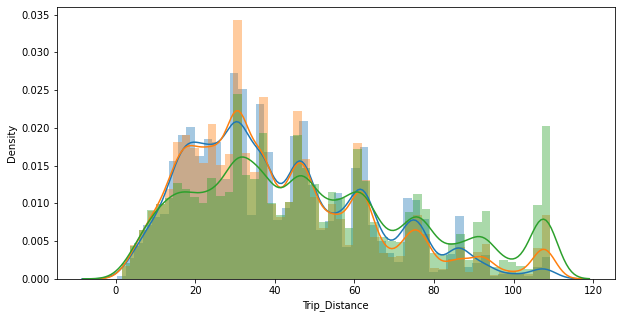

In [265]:
sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

# Visualization using plots the variance between group and within group

In [266]:
surge_1=df1[df1['Surge_Pricing_Type']==1]["Customer_Rating"]
surge_2=df1[df1['Surge_Pricing_Type']==2]["Customer_Rating"]
surge_3=df1[df1['Surge_Pricing_Type']==3]["Customer_Rating"]

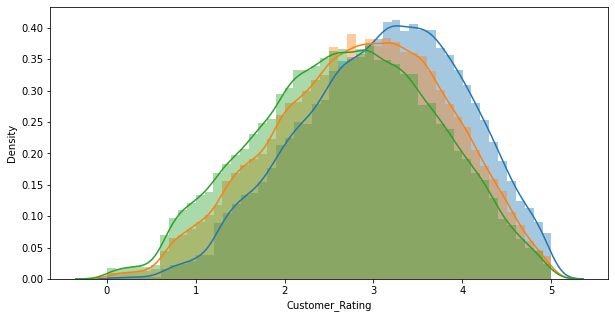

In [267]:
sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

In [268]:
surge_1=df1[df1['Surge_Pricing_Type']==1]["Life_Style_Index"]
surge_2=df1[df1['Surge_Pricing_Type']==2]["Life_Style_Index"]
surge_3=df1[df1['Surge_Pricing_Type']==3]["Life_Style_Index"]

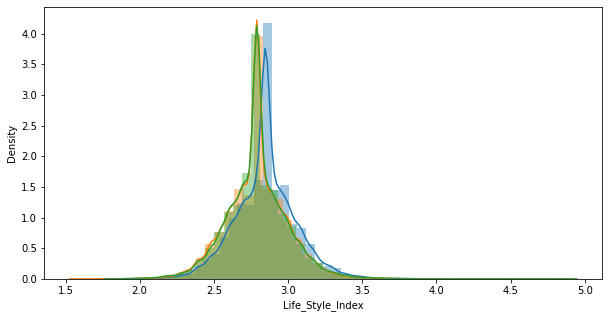

In [269]:
sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

In [270]:
surge_1=df1[df1['Surge_Pricing_Type']==1]["Var3"]
surge_2=df1[df1['Surge_Pricing_Type']==2]["Var3"]
surge_3=df1[df1['Surge_Pricing_Type']==3]["Var3"]

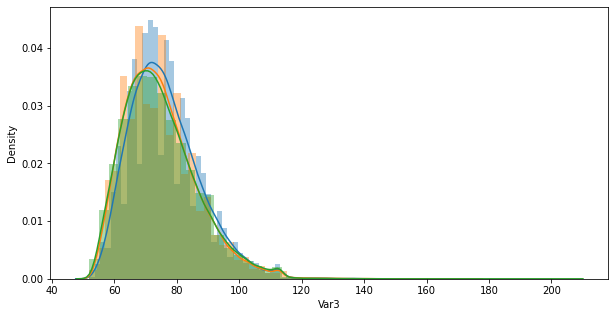

In [271]:
sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

# **We can see from Plot that within the group and between the group means are almost equal.There is an overlap it is diffcult to predict by means of linear models. so we are going for tree based models.** 

In [83]:
df2 = df2.drop(columns=['Var2'])

In [84]:
dummies = pd.get_dummies(data=df2,columns=df2.select_dtypes('object').columns,drop_first=True)

In [85]:
dummies.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,31.16,2.69170,2.14750,0.0,90.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.12,2.97795,4.93375,0.0,64.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,72.54,3.06236,2.08250,0.0,89.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,31.82,2.70044,3.15125,1.0,66.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,18.34,2.59621,3.15875,0.0,72.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
df2 = dummies.copy()

In [87]:
df2.shape

(112402, 36)

In [88]:
df2 = df2.reset_index(drop=False)

In [89]:
df2 = df2.drop(columns=['index'])

In [90]:
df2.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,31.16,2.69170,2.14750,0.0,90.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.12,2.97795,4.93375,0.0,64.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,72.54,3.06236,2.08250,0.0,89.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,31.82,2.70044,3.15125,1.0,66.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18.34,2.59621,3.15875,0.0,72.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
x = df2.drop(columns = ['Surge_Pricing_Type'])
y = df2.Surge_Pricing_Type

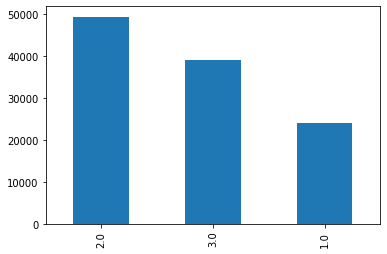

In [92]:
df2['Surge_Pricing_Type'].value_counts().plot(kind='bar')

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state = 7)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [97]:
import sklearn.metrics as metrics

In [106]:
lr = LogisticRegression()
base = lr.fit(xtrain,ytrain)
ypred = base.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [107]:
confusion_matrix(ytest,ypred)

array([[ 4690,  1580,   931],
       [  666, 12773,  1430],
       [  571,  2639,  8441]])

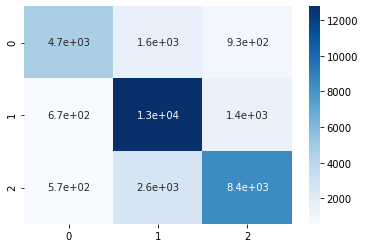

In [108]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [100]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.79      0.65      0.71      7201
         2.0       0.75      0.86      0.80     14869
         3.0       0.78      0.72      0.75     11651

    accuracy                           0.77     33721
   macro avg       0.77      0.74      0.76     33721
weighted avg       0.77      0.77      0.77     33721



In [101]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier()
model_v1 = rf.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [105]:
confusion_matrix(ytest,ypred)

array([[ 5171,  1364,   666],
       [  523, 12786,  1560],
       [  551,  1994,  9106]])

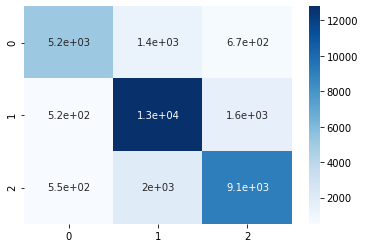

In [104]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [110]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.83      0.72      0.77      7201
         2.0       0.79      0.86      0.82     14869
         3.0       0.80      0.78      0.79     11651

    accuracy                           0.80     33721
   macro avg       0.81      0.79      0.79     33721
weighted avg       0.80      0.80      0.80     33721



In [ ]:
# The class weight is imbalanced , hence we are proceeding with smote over sampling technique

# Rebuilding data using Synthetic Minority Over-Sampling Technique for Numerical and Categorical (SMOTE-NC) 

In [111]:
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [112]:
df1.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [113]:
df1.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,31.16,2.69170,2.14750,0.0,53.0,90.0,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0.0,47.0,64.0,1.0
2,C,0,C,A,Male,72.54,3.06236,2.08250,0.0,52.0,89.0,1.0
3,B,1,A,A,Male,16.78,2.70013,1.61250,3.0,52.0,85.0,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44000,5.0,55.0,85.0,1.0


In [114]:
strategy = {1.0:40000,2.0:56728,3.0:47720}
cat_index = [0,1,2,3,4,8]
x = df1.drop(columns=['Surge_Pricing_Type'])
y = df1['Surge_Pricing_Type']

In [115]:
sm_nc = SMOTENC(categorical_features=cat_index,sampling_strategy=strategy,random_state=10)
x_sm,y_sm = sm_nc.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
x_sm = pd.DataFrame(data=x_sm,columns=x.columns)
y_sm = pd.Series(data=y_sm)

In [117]:
x_sm.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85


In [118]:
df1.shape

(131662, 12)

In [119]:
x_sm.shape

(144448, 11)

In [120]:
df_new = pd.concat([x_sm,y_sm],axis=1)

In [121]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  object 
 6   Life_Style_Index             144448 non-null  object 
 7   Customer_Rating              144448 non-null  object 
 8   Cancellation_Last_1Month     144448 non-null  object 
 9   Var2                         144448 non-null  object 
 10  Var3                         144448 non-null  object 
 11  0                            144448 non-null  float64
dtypes: float64(1), object(11)
memory usage: 13.2+ MB


In [122]:
df_new.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,0
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64,1.0
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89,1.0
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85,1.0


In [126]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  object 
 6   Life_Style_Index             144448 non-null  object 
 7   Customer_Rating              144448 non-null  object 
 8   Cancellation_Last_1Month     144448 non-null  object 
 9   Var2                         144448 non-null  object 
 10  Var3                         144448 non-null  object 
 11  0                            144448 non-null  float64
dtypes: float64(1), object(11)
memory usage: 13.2+ MB


In [ ]:
# We can analysis in tableau about Cancellation in last 1 month

In [128]:
df_new.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,0
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64,1.0
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89,1.0
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85,1.0


In [129]:
df_new[df_new['Var3']>150]['Customer_Rating'].mean()

2.5466666666666664

In [130]:
df_new[(df_new['Var3']<=150)&(df_new['Var3']>50)]['Customer_Rating'].mean()

2.8720235846688213

In [131]:
df_new['Var3'].min()

52.0

In [132]:
import scipy.stats as stats

In [133]:
def hyp_testing(pval,sig_lvl):
  if pval > sig_lvl:
    return 'Fail to reject Ho'
  else:
    return 'Ho rejected'

In [134]:
df_new.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
0                              0
dtype: int64

In [135]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  object 
 6   Life_Style_Index             144448 non-null  object 
 7   Customer_Rating              144448 non-null  object 
 8   Cancellation_Last_1Month     144448 non-null  object 
 9   Var2                         144448 non-null  object 
 10  Var3                         144448 non-null  object 
 11  0                            144448 non-null  float64
dtypes: float64(1), object(11)
memory usage: 13.2+ MB


In [139]:
df_new = df_new.drop(columns=['Var2'])  # multicollinearity between var2 and var3 so drop var2.

In [140]:
df_new['Customer_Since_Months'] = df_new['Customer_Since_Months'].astype('object')
df_new['Trip_Distance'] = df_new['Trip_Distance'].astype('float64')
df_new['Life_Style_Index'] = df_new['Life_Style_Index'].astype('float64')
df_new['Customer_Rating'] = df_new['Customer_Rating'].astype('float64')
df_new['Var3'] = df_new['Var3'].astype('int64')
df_new['Cancellation_Last_1Month'] = df_new['Cancellation_Last_1Month'].astype('int64')


In [141]:
df_new = df_new.rename(columns={0:'Surge_Pricing_Type'})

In [142]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  float64
 6   Life_Style_Index             144448 non-null  float64
 7   Customer_Rating              144448 non-null  float64
 8   Cancellation_Last_1Month     144448 non-null  int64  
 9   Var3                         144448 non-null  int64  
 10  Surge_Pricing_Type           144448 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 12.1+ MB


**NUMERICAL FEATURES**

In [150]:
df_new["Surge_Pricing_Type"]=df_new["Surge_Pricing_Type"].astype("object")

In [151]:
num_features=df_new.select_dtypes(exclude="object")
num_features.columns

Index(['Trip_Distance', 'Life_Style_Index', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var3'],
      dtype='object')

**CATEGORICAL FEATURES**

In [152]:
cat_features=df_new.select_dtypes(include="object")
cat_features.columns

Index(['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender', 'Surge_Pricing_Type'],
      dtype='object')

**VISUALIZATION**

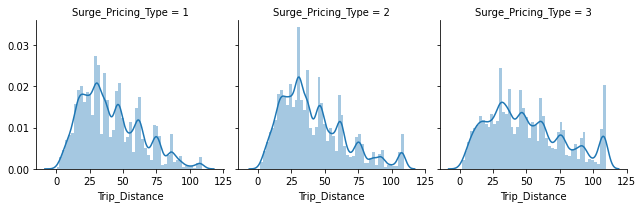

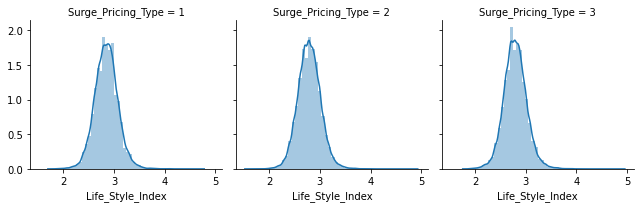

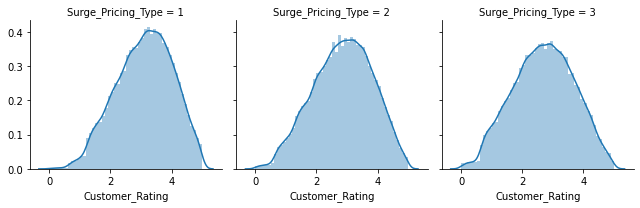

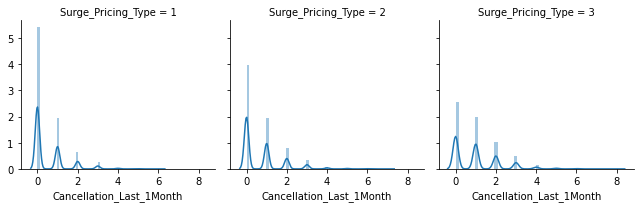

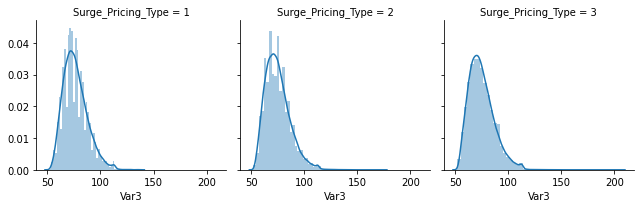

In [153]:
for i in num_features.columns:
    a = sns.FacetGrid(df, col='Surge_Pricing_Type')
    a.map(sns.distplot,i)
    plt.show()

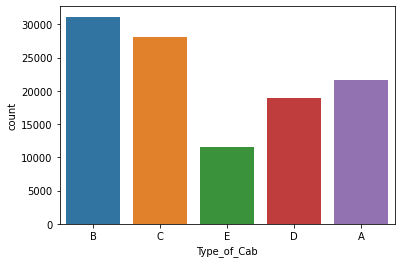

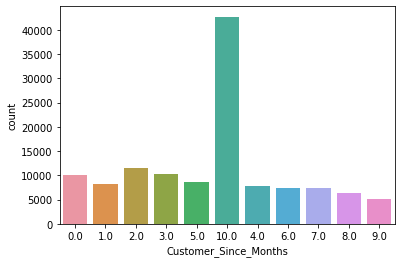

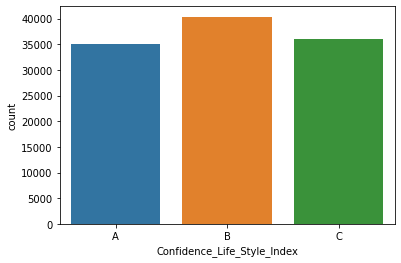

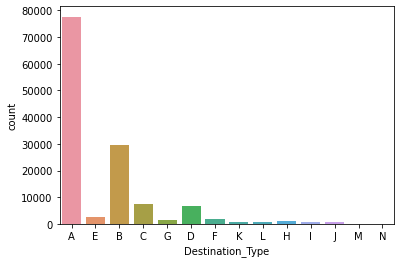

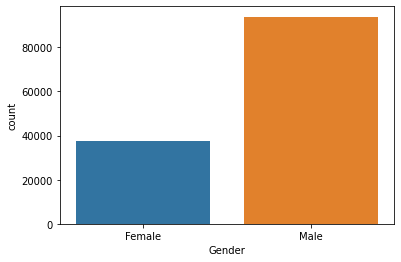

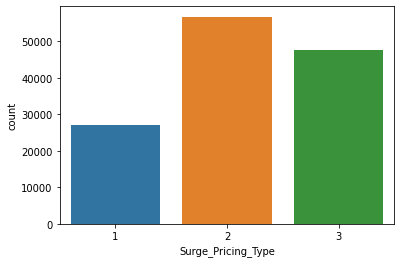

In [154]:
for i in cat_features.columns:
    sns.countplot(df[i])
    plt.show()

In [155]:
df_new["Surge_Pricing_Type"].value_counts()

2.0    56728
3.0    47720
1.0    40000
Name: Surge_Pricing_Type, dtype: int64

**BIVARIANT ANALYSIS**

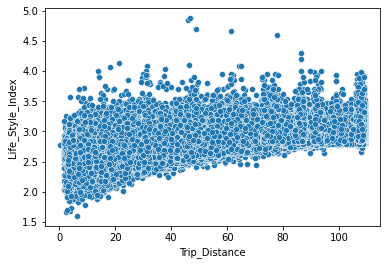

In [158]:
sns.scatterplot(df_new['Trip_Distance'],df_new["Life_Style_Index"])
plt.show()

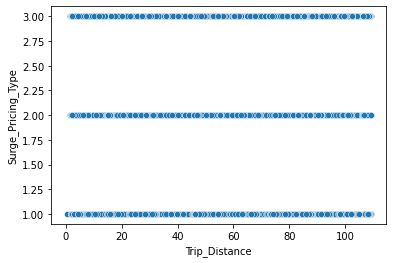

In [160]:
sns.scatterplot(df_new['Trip_Distance'],df_new["Surge_Pricing_Type"])
plt.show()

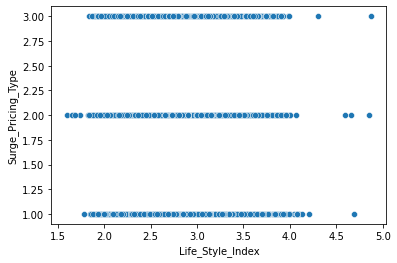

In [161]:
sns.scatterplot(df_new["Life_Style_Index"],df_new["Surge_Pricing_Type"])
plt.show()

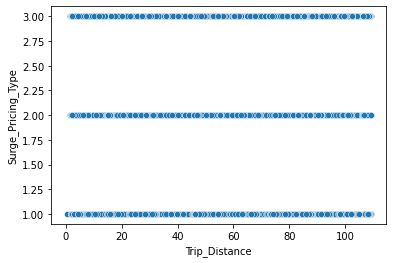

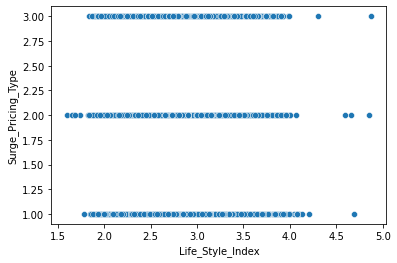

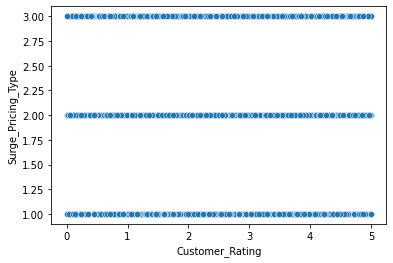

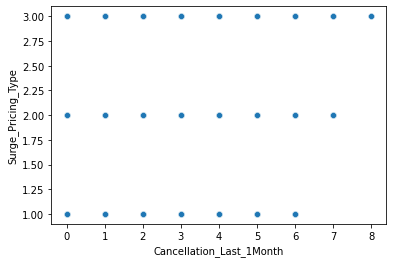

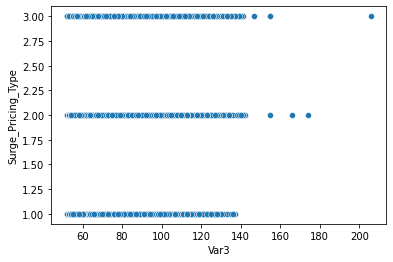

In [162]:
for i in num_features.columns:
    sns.scatterplot(df_new[i],df_new["Surge_Pricing_Type"])
    plt.show()

**Inference**


In [ ]:
# Trip distance and life style index is linearly correlated,as life_style_index increases trip distance of customer is also long. 

In [ ]:
#1 mostly car type D,E has huge surge_price
#2 mostly car type B,C has medium surge_price
#3 mostly car type A has low surge_price

In [ ]:
# There is no discrimination in gender for surge pricing as male and female has medium surge price in most of their trips.

**MULTI-VARIANT ANALYSIS**

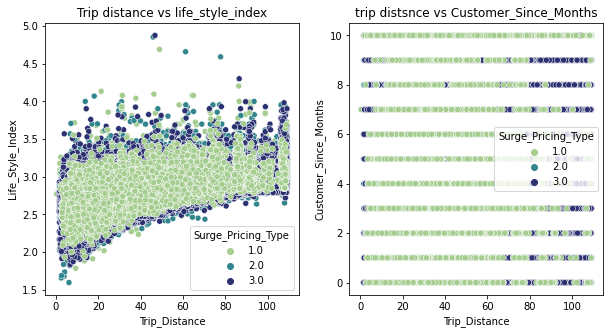

In [195]:
fig,(ax1,ax2)=plt.subplots(1,2)

ax1=plt.subplot(1,2,1)
plt.title("Trip distance vs life_style_index")
sns.scatterplot(y="Life_Style_Index",x="Trip_Distance",hue="Surge_Pricing_Type",data=df_new,ax=ax1,palette='crest')


ax2=plt.subplot(1,2,2)
plt.title("trip distsnce vs Customer_Since_Months")
sns.scatterplot(y="Customer_Since_Months",x="Trip_Distance",hue="Surge_Pricing_Type",data=df_new,ax=ax2,palette='crest')
plt.show()

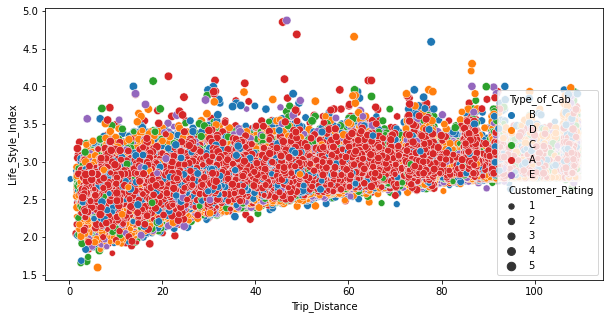

In [172]:
sns.scatterplot(data=df_new,x="Trip_Distance",y='Life_Style_Index',hue="Type_of_Cab",size='Customer_Rating')
plt.show()

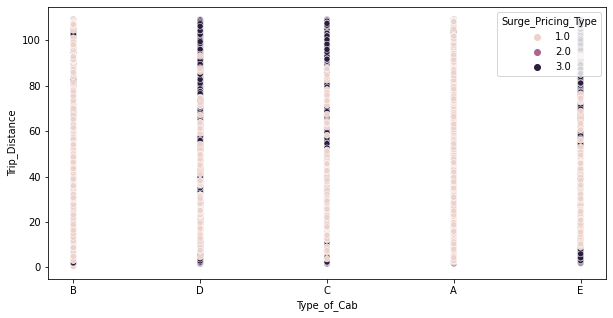

In [173]:
sns.scatterplot(data=df_new,y="Trip_Distance",x='Type_of_Cab',hue="Surge_Pricing_Type")
plt.show()

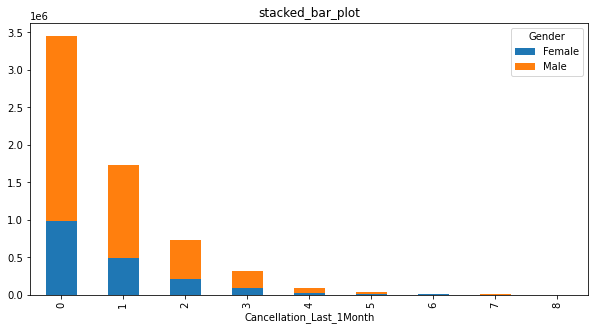

In [174]:
stack=pd.pivot_table(df_new,index=['Cancellation_Last_1Month'],columns=['Gender'],values="Trip_Distance",aggfunc="sum")
stack.plot.bar(title="stacked_bar_plot",stacked=True)
plt.show()

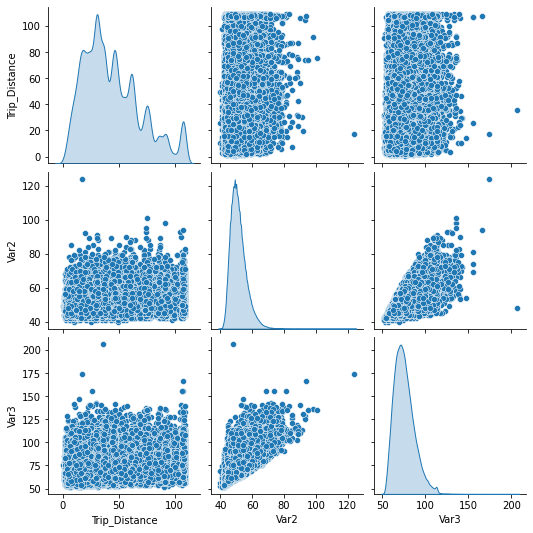

In [176]:
sns.pairplot(data = df , vars=['Trip_Distance', 'Var2', 'Var3'] , palette='husl',diag_kind='kde')
plt.show()

![picture](https://drive.google.com/uc?export=view&id=1ySuJq7CjVkPTbliDBK4NeTDQruHxitZH)

![picture](https://drive.google.com/uc?export=view&id=12QPgna_jvqg_C2maCC6nxlyDqEnD7LF3)


![picture](https://drive.google.com/uc?export=view&id=1spg7GPkDW6CCTehkhNisLAIBW3rzNY8W)

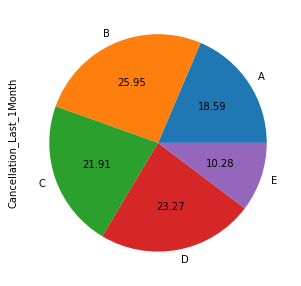

In [179]:
df_new.groupby('Type_of_Cab')['Cancellation_Last_1Month'].sum().plot(kind="pie",autopct="%0.2f")

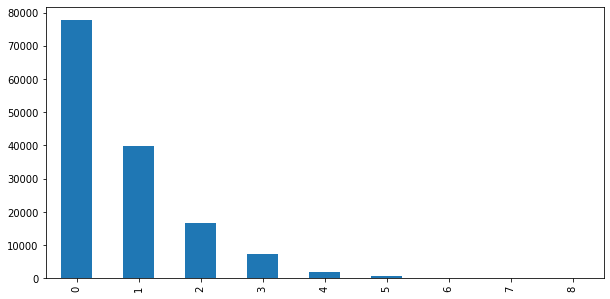

In [181]:
df_new['Cancellation_Last_1Month'].value_counts().plot(kind="bar")

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [ ]:
for i in df_ss.select_dtypes('number').columns:
  if i != 'Surge_Pricing_Type':
    ss = StandardScaler()
    df_ss[i] = ss.fit_transform(df_ss[[i]])

In [ ]:
for i in df_ss.select_dtypes('number').columns:
  if i != 'Surge_Pricing_Type':
    mm = MinMaxScaler()
    df_mm[i] = mm.fit_transform(df_mm[[i]])

In [ ]:
df_ss.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,-0.505529,-0.555347,-0.748854,-0.733142,1.284130,1.0
1,D,3,B,G,Male,-1.179886,0.833634,2.131015,-0.733142,-0.968719,1.0
2,C,0,C,A,Male,1.132083,1.243220,-0.816038,-0.733142,1.197482,1.0
3,B,1,A,A,Male,-1.074617,-0.514442,-1.301830,2.224514,0.850889,1.0
4,A,9,B,A,Male,-1.007735,-0.138968,-1.480126,4.196285,0.850889,1.0


In [ ]:
df_mm.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,0.283235,0.334068,0.429357,0.000,0.246753,1.0
1,D,3,B,G,Male,0.126790,0.421374,0.986747,0.000,0.077922,1.0
2,C,0,C,A,Male,0.663147,0.447118,0.416354,0.000,0.240260,1.0
3,B,1,A,A,Male,0.151212,0.336639,0.322331,0.375,0.214286,1.0
4,A,9,B,A,Male,0.166728,0.360240,0.287822,0.625,0.214286,1.0


In [ ]:
df_ss = pd.get_dummies(data = df_ss,columns=df_ss.select_dtypes('object').columns,drop_first=True)
df_mm = pd.get_dummies(data = df_mm,columns=df_mm.select_dtypes('object').columns,drop_first=True)


In [ ]:
df_mm.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,0.283235,0.334068,0.429357,0.000,0.246753,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.126790,0.421374,0.986747,0.000,0.077922,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.663147,0.447118,0.416354,0.000,0.240260,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.151212,0.336639,0.322331,0.375,0.214286,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.166728,0.360240,0.287822,0.625,0.214286,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_ss.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-0.505529,-0.555347,-0.748854,-0.733142,1.284130,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.179886,0.833634,2.131015,-0.733142,-0.968719,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1.132083,1.243220,-0.816038,-0.733142,1.197482,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.074617,-0.514442,-1.301830,2.224514,0.850889,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.007735,-0.138968,-1.480126,4.196285,0.850889,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Model Building with Standard Scaler

In [ ]:
x = df_ss.drop(columns=['Surge_Pricing_Type'])
y = df_ss['Surge_Pricing_Type']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state=7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
base = knn.fit(xtrain,ytrain)
ypred = base.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74     12033
         2.0       0.72      0.75      0.73     16937
         3.0       0.79      0.70      0.74     14365

    accuracy                           0.74     43335
   macro avg       0.74      0.74      0.74     43335
weighted avg       0.74      0.74      0.74     43335



In [ ]:
rf = RandomForestClassifier()
model_v1 = rf.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.78      0.82     12033
         2.0       0.76      0.85      0.80     16937
         3.0       0.82      0.77      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.81     43335
weighted avg       0.81      0.80      0.80     43335



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
model_v2 = xgb.fit(xtrain,ytrain)
ypred = model_v2.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.76      0.86      0.80     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.79      0.80     43335
weighted avg       0.80      0.80      0.80     43335



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
model_v5 = gb.fit(xtrain,ytrain)
ypred = model_v5.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.75      0.86      0.81     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.80     43335
weighted avg       0.81      0.80      0.80     43335



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
model_v6 = dt.fit(xtrain,ytrain)
ypred = model_v6.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.73      0.73     12033
         2.0       0.70      0.71      0.70     16937
         3.0       0.72      0.70      0.71     14365

    accuracy                           0.71     43335
   macro avg       0.71      0.71      0.71     43335
weighted avg       0.71      0.71      0.71     43335



# Models using MinmaxScaler


In [ ]:
x = df_mm.drop(columns=['Surge_Pricing_Type'])
y = df_mm['Surge_Pricing_Type']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state = 7)

In [ ]:
knn = KNeighborsClassifier()
model_v1 = knn.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.76      0.76      0.76     12033
         2.0       0.72      0.77      0.75     16937
         3.0       0.77      0.71      0.74     14365

    accuracy                           0.75     43335
   macro avg       0.75      0.75      0.75     43335
weighted avg       0.75      0.75      0.75     43335



In [ ]:
rf = RandomForestClassifier()
model_v2 = rf.fit(xtrain,ytrain)
ypred = model_v2.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.78      0.82     12033
         2.0       0.76      0.85      0.80     16937
         3.0       0.82      0.77      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.81     43335
weighted avg       0.81      0.80      0.80     43335



In [ ]:
xgb = XGBClassifier()
model_v3 = xgb.fit(xtrain,ytrain)
ypred = model_v3.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.76      0.86      0.80     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.79      0.80     43335
weighted avg       0.80      0.80      0.80     43335



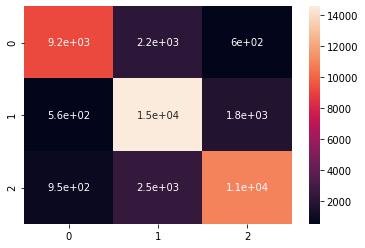

In [ ]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred),annot=True)

In [ ]:
dt = DecisionTreeClassifier()
model_v3 = dt.fit(xtrain,ytrain)
ypred = model_v3.predict(xtest)

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.74      0.73     12033
         2.0       0.70      0.71      0.70     16937
         3.0       0.72      0.70      0.71     14365

    accuracy                           0.71     43335
   macro avg       0.71      0.71      0.71     43335
weighted avg       0.71      0.71      0.71     43335



In [ ]:
# We can conclude that both scaling methods are giving similar results
# So we are going with MinMaxScaler

# Main Model Building

Description:
As we move forward , we are mainly focusing on the metric f1-weighted and ways to improve it. The main reason for choosing this metric is because this is the weighted variant of f1-score which is the combination precision and recall which makes the score stable and reliable. We will do two main techniques to improve the f1-weighted score -  GridSearchCV and Cross-Validation

**Base Model (KNN)**

In [188]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier()
base_model = knn.fit(xtrain,ytrain)
ypred = base_model.predict(xtest)

In [190]:
confusion_matrix(ytest,ypred)

array([[ 3802,  2658,   741],
       [ 2501, 10613,  1755],
       [ 1987,  3114,  6550]])

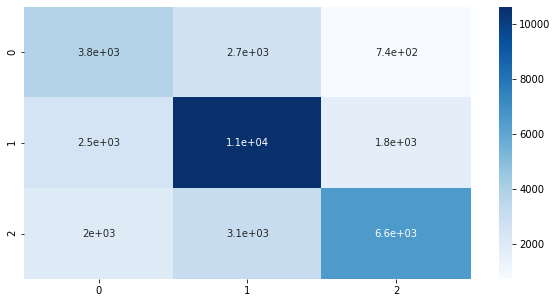

In [191]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")

In [192]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.46      0.53      0.49      7201
         2.0       0.65      0.71      0.68     14869
         3.0       0.72      0.56      0.63     11651

    accuracy                           0.62     33721
   macro avg       0.61      0.60      0.60     33721
weighted avg       0.63      0.62      0.62     33721



In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=knn,X=x,y=y,scoring='f1_weighted',cv=kf)
score_knn = np.mean(scores)
bias_knn = 1-np.mean(score_knn)
var_knn = np.std(score_knn)/np.mean(score_knn)

print('Average f1-weighted score = ',np.mean(score_knn))
print('Bias error(in %) = ',bias_knn * 100 , '%')
print('Variance error(in %) = ',var_knn * 100,'%')

Average f1-weighted score =  0.7491425413096751
Bias error(in %) =  25.085745869032493 %
Variance error(in %) =  0.0 %


# Standalone model - 1  Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=dt,X=x,y=y,scoring='f1_weighted',cv=kf)
score_dt = np.mean(scores)
bias_dt = 1-np.mean(score_dt)
var_dt = np.std(score_dt)/np.mean(score_dt)

print('Average f1-weighted score = ',np.mean(score_dt))
print('Bias error(in %) = ',bias_dt * 100 , '%')
print('Variance error(in %) = ',var_dt * 100,'%')

Average f1-weighted score =  0.7135922039590084
Bias error(in %) =  28.640779604099166 %
Variance error(in %) =  0.0 %


# Ensemble Model - 1 Random Forest 

In [ ]:
rf = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_rf = np.mean(scores)
bias_rf = 1-np.mean(score_rf)
var_rf = np.std(score_rf)/np.mean(score_rf)

print('Average f1-weighted score = ',np.mean(score_rf))
print('Bias error(in %) = ',bias_rf * 100 , '%')
print('Variance error(in %) = ',var_rf * 100,'%')

Average f1-weighted score =  0.8037827341172183
Bias error(in %) =  19.621726588278165 %
Variance error(in %) =  0.0 %


# Ensemble Model - 2 AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=ada,X=x,y=y,scoring='f1_weighted',cv=kf)
score_ada = np.mean(scores)
bias_ada = 1-np.mean(score_ada)
var_ada = np.std(score_ada)/np.mean(score_ada)

print('Average f1-weighted score = ',np.mean(score_ada))
print('Bias error(in %) = ',bias_ada * 100 , '%')
print('Variance error(in %) = ',var_ada * 100,'%')

Average f1-weighted score =  0.786245108479534
Bias error(in %) =  21.3754891520466 %
Variance error(in %) =  0.0 %


# Ensemble Model - 3 XGBoost

In [ ]:
xgb = XGBClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=xgb,X=x,y=y,scoring='f1_weighted',cv=kf)
score_xgb = np.mean(scores)
bias_xgb = 1-np.mean(score_xgb)
var_xgb = np.std(score_xgb)/np.mean(score_xgb)

print('Average f1-weighted score = ',np.mean(score_xgb))
print('Bias error(in %) = ',bias_xgb * 100 , '%')
print('Variance error(in %) = ',var_xgb * 100,'%')

Average f1-weighted score =  0.8010246573656294
Bias error(in %) =  19.897534263437056 %
Variance error(in %) =  0.0 %


# Collecting the results for the models we done so far

In [ ]:
res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb]})

In [ ]:
res

,Models,F1-Weighted,Bias Error,Variance Error
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0
2,RandomForest,0.803783,0.196217,0.0
3,AdaBoosting,0.786245,0.213755,0.0
4,XGBoost,0.801025,0.198975,0.0


# Stacking and Bagging models

Description :

We will stacking 3 of the best models and find out the f1_weighted score and then out of that we will do bagging of the single best model

In [ ]:
from sklearn.ensemble import StackingClassifier,BaggingClassifier

In [ ]:
est = [('RandomForest',rf),('AdaBoost',ada),('XGBoost',xgb)]
stack = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=stack,X=x,y=y,scoring='f1_weighted',cv=kf)
score_stack = np.mean(scores)
bias_stack = 1-np.mean(score_stack)
var_stack = np.std(score_stack)/np.mean(score_stack)

print('Average f1-weighted score = ',np.mean(score_stack))
print('Bias error(in %) = ',bias_stack * 100 , '%')
print('Variance error(in %) = ',var_stack * 100,'%')

Average f1-weighted score =  0.8067074633685383
Bias error(in %) =  19.329253663146172 %
Variance error(in %) =  0.0 %


In [ ]:
bag = BaggingClassifier(base_estimator=stack)
bag = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=bag,X=x,y=y,scoring='f1_weighted',cv=kf)
score_bag = np.mean(scores)
bias_bag = 1-np.mean(score_bag)
var_bag = np.std(score_bag)/np.mean(score_bag)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_bag * 100 , '%')
print('Variance error(in %) = ',var_bag * 100,'%')

Average f1-weighted score =  0.8066626879618257
Bias error(in %) =  19.33373120381743 %
Variance error(in %) =  0.0 %


# Final summary of the data

In [ ]:
final_res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost','Stacking','Bagging'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb,score_stack,score_bag],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb,bias_stack,bias_bag],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb,var_stack,var_bag]})

In [ ]:
final_res.sort_values('F1-Weighted',ascending=False)

,Models,F1-Weighted,Bias Error,Variance Error
5,Stacking,0.806707,0.193293,0.0
6,Bagging,0.806663,0.193337,0.0
2,RandomForest,0.803783,0.196217,0.0
4,XGBoost,0.801025,0.198975,0.0
3,AdaBoosting,0.786245,0.213755,0.0
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0


In [ ]:
# Stacking Classifier is the best performing model , but as stacking bagging is based on random forest , 
# we are doing gridsearch hyperparameter tuning on random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Final model using GridSearchCV

In [ ]:
rf = RandomForestClassifier()
params = ({'n_estimators': np.arange(100,200,25),
           'max_depth':np.arange(5,22,2),
           'criterion':['gini','entropy']})
kf = KFold(n_splits=3,shuffle=True,random_state=7)
grid = GridSearchCV(estimator=rf,param_grid=params,scoring='f1_weighted',cv=kf,n_jobs=-1)
grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fra...n_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 150}

In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=21,n_estimators=150)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_final = np.mean(scores)
bias_final = 1-np.mean(score_final)
var_final = np.std(score_final)/np.mean(score_final)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_final * 100 , '%')
print('Variance error(in %) = ',var_final * 100,'%')

Average f1-weighted score =  0.8043249935537643
Bias error(in %) =  19.56750064462357 %
Variance error(in %) =  0.0 %


**Model Deployment is given as per attachment of file we have done deployment using Flask and HTML,CSS.**